**Домашнее задание**

Дана статистика пользователей adult.csv.

Получить значения AUC для различных моделей и их параметров.

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('adult.csv')

**Подготовка данных**

Удаляем столбец *fnlwgt*, т.к. он не связан с целевой переменной, и столбец *education*, т.к. столбец *educational_num* дублирует его.

In [197]:
data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

Заполняем пропуски модой

In [198]:
data = data.replace('?', np.NaN)

fill_mode = lambda col: col.fillna(col.mode()[0])
data = data.apply(fill_mode, axis=0)

data.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [199]:
num_cols = list(data.select_dtypes(include=['int64', 'float64']).columns)
obj_cols = list(data.select_dtypes(include=['object']).columns)
obj_cols.remove('income')

**Построение модели**

In [200]:
X = pd.concat([data[num_cols], pd.get_dummies(data[obj_cols])], axis=1)
y = data['income'].apply(lambda income: 1 if income == '>50K' else 0)

building logreg for iter = 100
ROC AUC score is: 0.6778

building logreg for iter = 200
ROC AUC score is: 0.7557

building logreg for iter = 300
ROC AUC score is: 0.7564

building logreg for iter = 400
ROC AUC score is: 0.7599

building logreg for iter = 500
ROC AUC score is: 0.7577

building logreg for iter = 600
ROC AUC score is: 0.7600

building logreg for iter = 700
ROC AUC score is: 0.7622

building logreg for iter = 800
ROC AUC score is: 0.7616

building logreg for iter = 900
ROC AUC score is: 0.7604

building logreg for iter = 1000
ROC AUC score is: 0.7623

building logreg for iter = 1100
ROC AUC score is: 0.7613

building logreg for iter = 1200
ROC AUC score is: 0.7588

building logreg for iter = 1300
ROC AUC score is: 0.7583

building logreg for iter = 1400
ROC AUC score is: 0.7575

building logreg for iter = 1500
ROC AUC score is: 0.7601

building logreg for iter = 1600
ROC AUC score is: 0.7599

building logreg for iter = 1700
ROC AUC score is: 0.7623

building logreg for ite

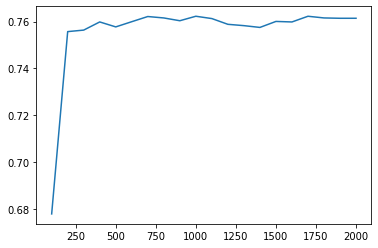

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings

warnings.filterwarnings('ignore')


def train_model(algo, *args):
    X_train, X_test, y_train, y_test = args
    
    model = algo
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    return roc_auc_score(y_test, y_pred)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scores = dict()
for mi in range(100, 2001, 100):
    print(f'building logreg for iter = {mi}')
    score = train_model(LogisticRegression(max_iter=mi), X_train, X_test, y_train, y_test)
    print(f'ROC AUC score is: {score:.4f}', end='\n\n')
    scores[mi] = score

# fpr, tpr, threshold = roc_curve(y_test, y_pred)
# auc_ = auc(fpr, tpr)

# plt.plot(fpr, tpr)
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

# print(f'ROC AUC score: {auc_score}\nAUC: {auc_}')

In [212]:
import operator

best_iter, best_score = max(scores.items(), key=operator.itemgetter(1))

print(f'Best AUC score is {best_score:.4f} on iterations_num={best_iter}')

Best AUC score is 0.7623 on iterations_num=1000


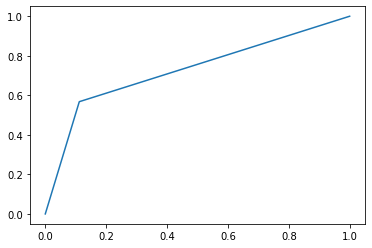

In [230]:
model1 = LogisticRegression(max_iter=best_iter)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred_proba1 = model1.predict_proba(X_test)
y_test1 = y_test

fpr, tpr, _ = roc_curve(y_test, y_pred1)

plt.plot(fpr, tpr)
plt.show()

**Построение модели, состоящей из numerical-признаков**

AUC score for model2 is: 0.6662


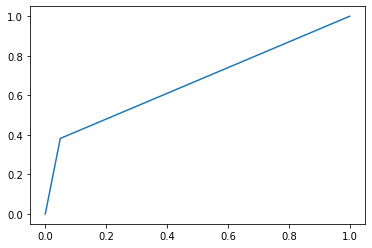

In [231]:
X_num = data[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2)

model2 = LogisticRegression(max_iter=100)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
y_pred_proba2 = model2.predict_proba(X_test)
y_test2 = y_test

print(f'AUC score for model2 is: {roc_auc_score(y_test, y_pred2):.4f}')

fpr, tpr, _ = roc_curve(y_test, y_pred2)

plt.plot(fpr, tpr)
plt.show()

**Построение модели, состоящей из object-признаков**

AUC score for model3 is: 0.7084


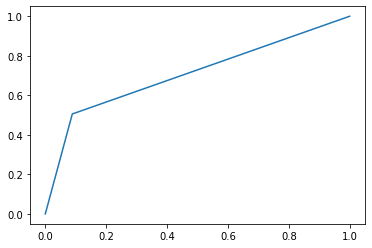

In [232]:
X_obj = pd.get_dummies(data[obj_cols])

X_train, X_test, y_train, y_test = train_test_split(X_obj, y, test_size=0.2)

model3 = LogisticRegression(max_iter=200)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
y_pred_proba3 = model3.predict_proba(X_test)

print(f'AUC score for model3 is: {roc_auc_score(y_test, y_pred3):.4f}')

fpr, tpr, _ = roc_curve(y_test, y_pred3)

plt.plot(fpr, tpr)
plt.show()

**Сравнение трёх моделей**

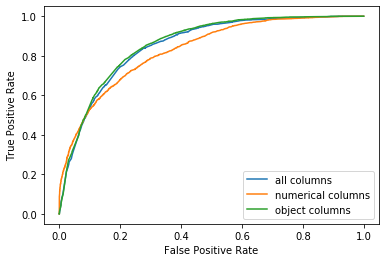

In [233]:
fpr1, tpr1, _ = roc_curve(y_test1, y_pred_proba1[:, 1])
fpr2, tpr2, _ = roc_curve(y_test2, y_pred_proba2[:, 1])
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba3[:, 1])

plt.plot(fpr1, tpr1, label='all columns')
plt.plot(fpr2, tpr2, label='numerical columns')
plt.plot(fpr3, tpr3, label='object columns')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()